In [2]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling, RandomRotation, RandomZoom, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from pathlib import Path

weight_filename = 'v2.h5_46.weights.h5'
experiment = 'v2'

def get_new_model(width, height):
    model = Sequential([
        # Preprocessing layers
        Rescaling(1./255, input_shape=(width, height, 1)),
        # Convolutional layers
        Conv2D(32, (3, 3), activation='relu', padding='same', name='conv1'),
        MaxPooling2D(pool_size=(2, 2), name='maxpool1'),
        Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2'),
        MaxPooling2D(pool_size=(2, 2), name='maxpool2'),
        Conv2D(128, (3, 3), activation='relu', padding='same', name='conv3'),
        MaxPooling2D(pool_size=(2, 2), name='maxpool3'),
        Flatten(name='flatten'),
        Dense(128, activation='relu', name='dense1'),
        Dropout(0.5, name='dropout'),
        Dense(2, activation='softmax', name='output')
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Load model
model = get_new_model(256, 256)
model.load_weights(weight_filename)

def get_class_name_from_path(path):
    if 'empty' in str(path):
        return 'empty'
    if 'occupied' in str(path):
        return 'occupied'
    raise Exception('Unknown class')

def get_class_name_from_index(index):
    if index == 0:
        return 'empty'
    if index == 1:
        return 'occupied'
    raise Exception('Unknown class')

def prepare_and_predict(image_path, model, target_size=(256, 256)):
    img = load_img(image_path, target_size=target_size, color_mode='grayscale')
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    
    prediction = model.predict(img_array)
    predicted_class = get_class_name_from_index(np.argmax(prediction, axis=1)[0])
    true_class = get_class_name_from_path(image_path)
    return image_path, true_class, predicted_class, prediction[0][0], prediction[0][1]


/Users/mkubicek/repos/charging-station-monitor/.env/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-05-04 11:20:36.172492: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Max
2024-05-04 11:20:36.172511: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 128.00 GB
2024-05-04 11:20:36.172516: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 48.00 GB
2024-05-04 11:20:36.172687: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-04 11:20:36.172698: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Cr

In [3]:
import pandas as pd
image_paths = Path('./data_training/validation/').rglob('*.jpg')

predictions = [prepare_and_predict(image_path, model) for image_path in image_paths]

2024-05-04 11:20:36.431527: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 816ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

In [4]:
predictions_df = pd.DataFrame(predictions, columns=['image_path', 'true_class', 'predicted_class', 'empty_prediction', 'occupied_prediction'])

In [5]:
wrong_predictions_count = (predictions_df['true_class'] != predictions_df['predicted_class']).sum()
total_predictions = len(predictions_df)
percentage_wrong_predictions = (wrong_predictions_count / total_predictions) * 100
print(f"Percentage of wrong predictions: {percentage_wrong_predictions:.2f}%")

Percentage of wrong predictions: 0.89%


In [6]:
wrong_empty_predictions = predictions_df[
    (predictions_df['true_class'] == 'empty') & (predictions_df['predicted_class'] != 'empty')
]

wrong_occupied_predictions = predictions_df[
    (predictions_df['true_class'] == 'occupied') & (predictions_df['predicted_class'] != 'occupied')
]

total_empty_predictions = predictions_df[predictions_df['true_class'] == 'empty'].shape[0]
total_occupied_predictions = predictions_df[predictions_df['true_class'] == 'occupied'].shape[0]

percentage_wrong_empty = (len(wrong_empty_predictions) / total_empty_predictions * 100) if total_empty_predictions > 0 else 0
percentage_wrong_occupied = (len(wrong_occupied_predictions) / total_occupied_predictions * 100) if total_occupied_predictions > 0 else 0

print(f"Percentage of 'empty' predictions that were wrong: {percentage_wrong_empty:.2f}%")
print(f"Percentage of 'occupied' predictions that were wrong: {percentage_wrong_occupied:.2f}%")

Percentage of 'empty' predictions that were wrong: 3.78%
Percentage of 'occupied' predictions that were wrong: 0.10%


In [7]:
print("Training set empty:  " + str(len(list(Path('./data_training/training/empty').rglob('*.jpg')))))
print("Training set occupied:  " + str(len(list(Path('./data_training/training/occupied').rglob('*.jpg')))))
print("Validation set empty:  " + str(len(list(Path('./data_training/validation/empty').rglob('*.jpg')))))
print("Validation set occupied:  " + str(len(list(Path('./data_training/validation/occupied').rglob('*.jpg')))))

Training set empty:  41834
Training set occupied:  46608
Validation set empty:  874
Validation set occupied:  3152


In [8]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
from glob import glob
import random
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils import normalize
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling
from tensorflow.keras.models import Model

def get_new_model(width, height):
    inputs = Input(shape=(width, height, 1))
    x = Rescaling(1./255.0)(inputs)
    x = Conv2D(32, (3, 3), activation='relu', padding='same', name='conv1')(x)
    x = MaxPooling2D(pool_size=(2, 2), name='maxpool1')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2')(x)
    x = MaxPooling2D(pool_size=(2, 2), name='maxpool2')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='conv3')(x)
    x = MaxPooling2D(pool_size=(2, 2), name='maxpool3')(x)
    x = Flatten(name='flatten')(x)
    x = Dense(128, activation='relu', name='dense1')(x)
    x = Dropout(0.5, name='dropout')(x)
    outputs = Dense(2, activation='softmax', name='output')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = get_new_model(256, 256)
model.load_weights(weight_filename)

model_modifier = ReplaceToLinear()
gradcam = Gradcam(model, model_modifier=model_modifier, clone=True)


/Users/mkubicek/repos/charging-station-monitor/.env/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


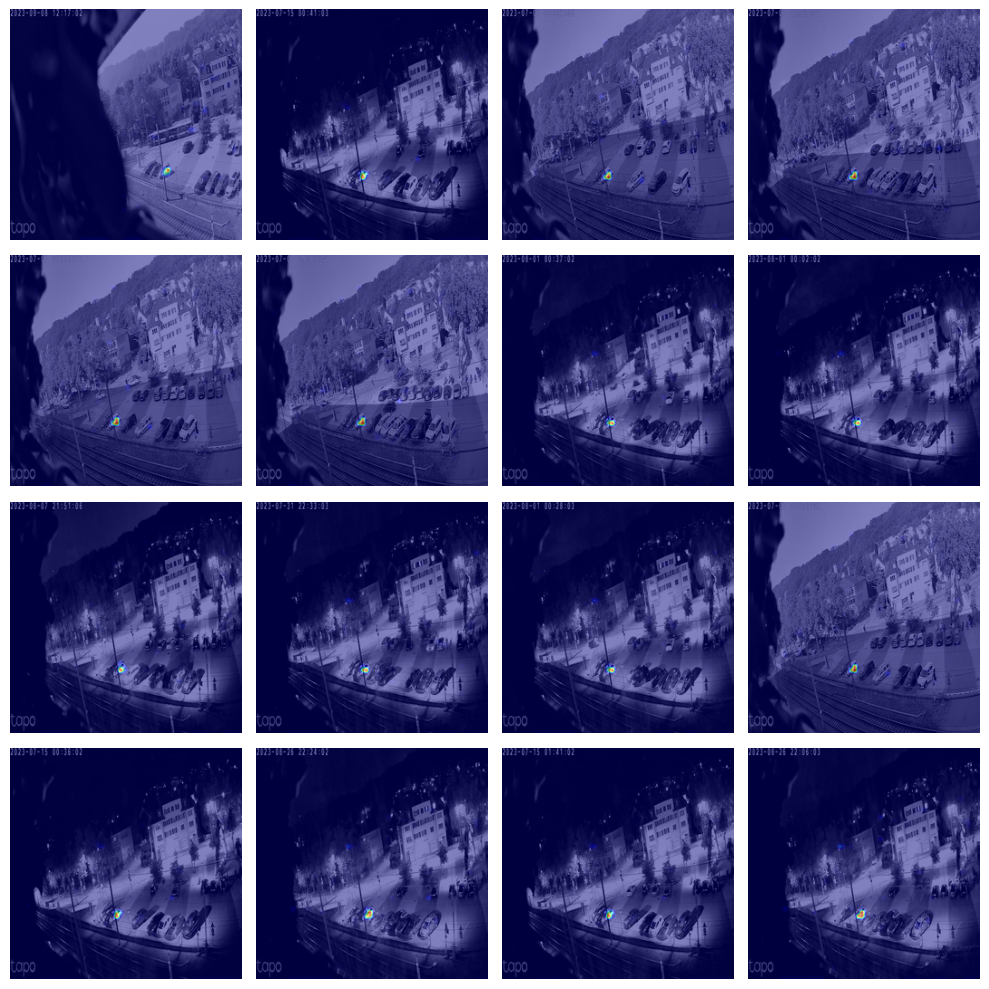

In [13]:
# show grad-cam heatmap of empty and correctly predicted
def loss(output):
    return output[:, 0]

correct_predictions_df = predictions_df[('empty' == predictions_df['true_class']) & (predictions_df['true_class'] == predictions_df['predicted_class'])]
selected_images = correct_predictions_df.sample(n=16, random_state=42)['image_path'].tolist()

fig, axs = plt.subplots(4, 4, figsize=(10, 10))
axs = axs.flatten()

for idx, image_path in enumerate(selected_images):
    img = Image.open(image_path).convert('L')
    img = img.resize((256, 256), Image.Resampling.LANCZOS)
    img_array = np.array(img) / 1.0
    img_array = img_array[:, :, np.newaxis]

    heatmap = gradcam(loss, img_array[np.newaxis, ...], penultimate_layer='conv3', expand_cam=True)
    heatmap = normalize(heatmap)
    heatmap_resized = cv2.resize(heatmap[0], (256, 256))

    axs[idx].imshow(img_array.squeeze(), cmap='gray')
    axs[idx].imshow(heatmap_resized, cmap='jet', alpha=0.5)
    axs[idx].axis('off')

plt.tight_layout()
plt.savefig('artifacts/gradcam-correctly-predicted-empty_{}.png'.format(experiment))

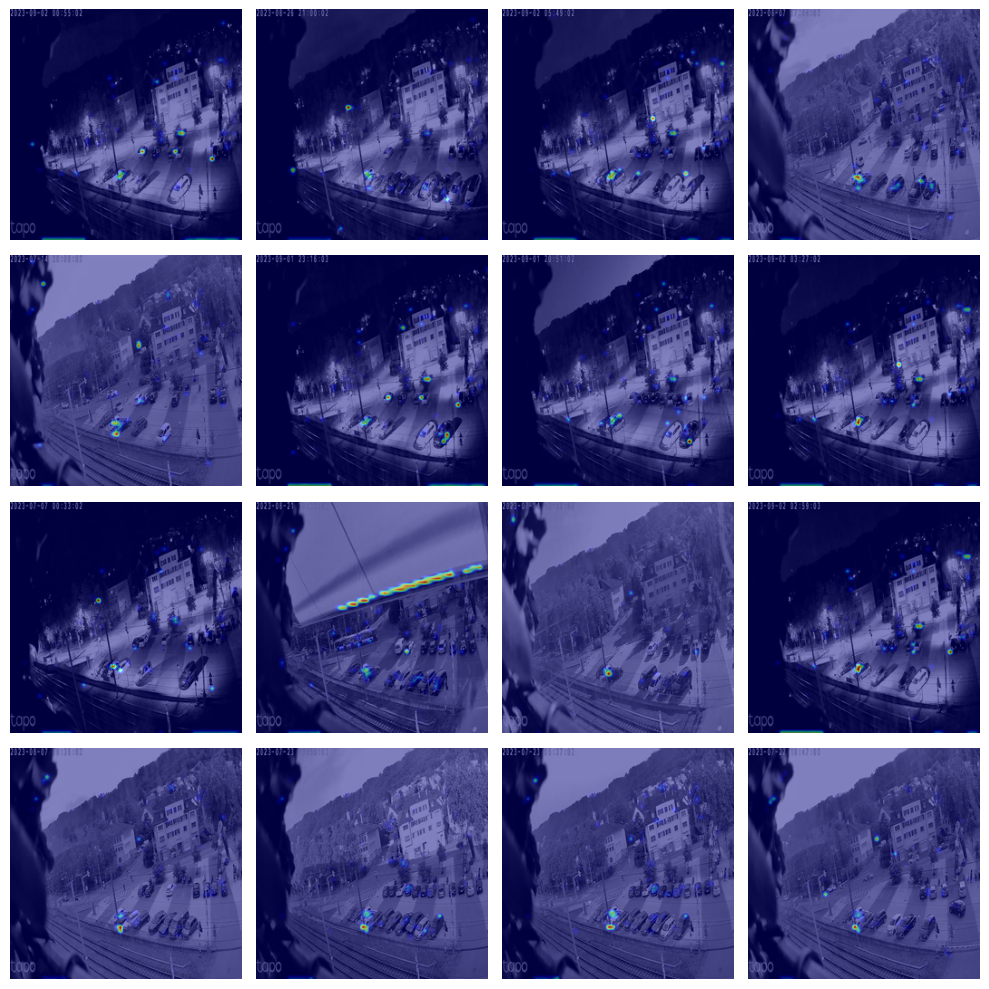

In [14]:
# show grad-cam heatmap of occupied and correctly predicted
def loss(output):
    return output[:, 1]

correct_predictions_df = predictions_df[('occupied' == predictions_df['true_class']) & (predictions_df['true_class'] == predictions_df['predicted_class'])]
selected_images = correct_predictions_df.sample(n=16, random_state=42)['image_path'].tolist()

fig, axs = plt.subplots(4, 4, figsize=(10, 10))
axs = axs.flatten()

for idx, image_path in enumerate(selected_images):
    img = Image.open(image_path).convert('L')
    img = img.resize((256, 256), Image.Resampling.LANCZOS)
    img_array = np.array(img) / 1.0
    img_array = img_array[:, :, np.newaxis]

    heatmap = gradcam(loss, img_array[np.newaxis, ...], penultimate_layer='conv3', expand_cam=True)
    heatmap = normalize(heatmap)
    heatmap_resized = cv2.resize(heatmap[0], (256, 256))

    axs[idx].imshow(img_array.squeeze(), cmap='gray')
    axs[idx].imshow(heatmap_resized, cmap='jet', alpha=0.5)
    axs[idx].axis('off')

plt.tight_layout()
plt.savefig('artifacts/gradcam-correctly-predicted-occupied_{}.png'.format(experiment))

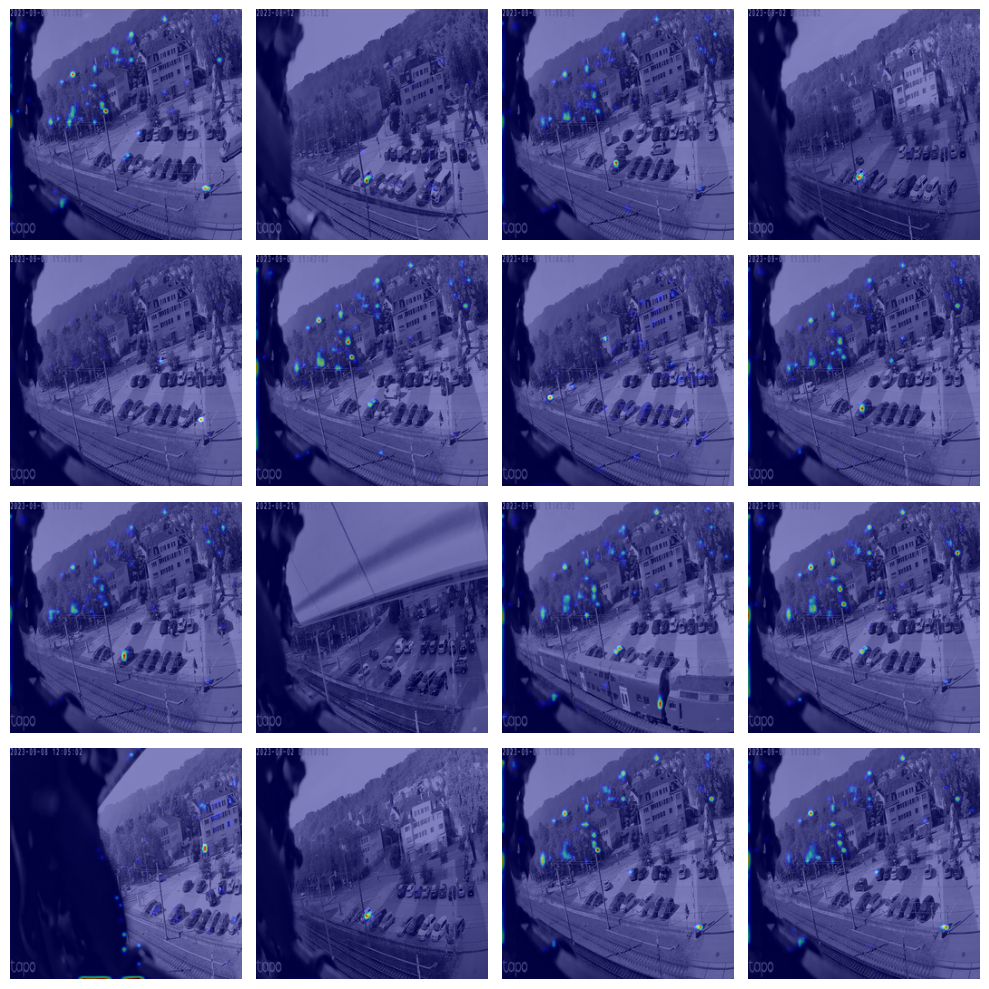

In [15]:
# show grad-cam heatmap of empty but incorrectly predicted
def loss(output):
    return output[:, 0]

correct_predictions_df = predictions_df[('empty' == predictions_df['true_class']) & (predictions_df['true_class'] != predictions_df['predicted_class'])]
selected_images = correct_predictions_df.sample(n=16, random_state=42)['image_path'].tolist()

fig, axs = plt.subplots(4, 4, figsize=(10, 10))
axs = axs.flatten()

for idx, image_path in enumerate(selected_images):
    img = Image.open(image_path).convert('L')
    img = img.resize((256, 256), Image.Resampling.LANCZOS)
    img_array = np.array(img) / 1.0
    img_array = img_array[:, :, np.newaxis]

    heatmap = gradcam(loss, img_array[np.newaxis, ...], penultimate_layer='conv3', expand_cam=True)
    heatmap = normalize(heatmap)
    heatmap_resized = cv2.resize(heatmap[0], (256, 256))

    axs[idx].imshow(img_array.squeeze(), cmap='gray')
    axs[idx].imshow(heatmap_resized, cmap='jet', alpha=0.5)
    axs[idx].axis('off')

plt.tight_layout()
plt.savefig('artifacts/gradcam-empty-but-incorrectly-predicted_{}.png'.format(experiment))

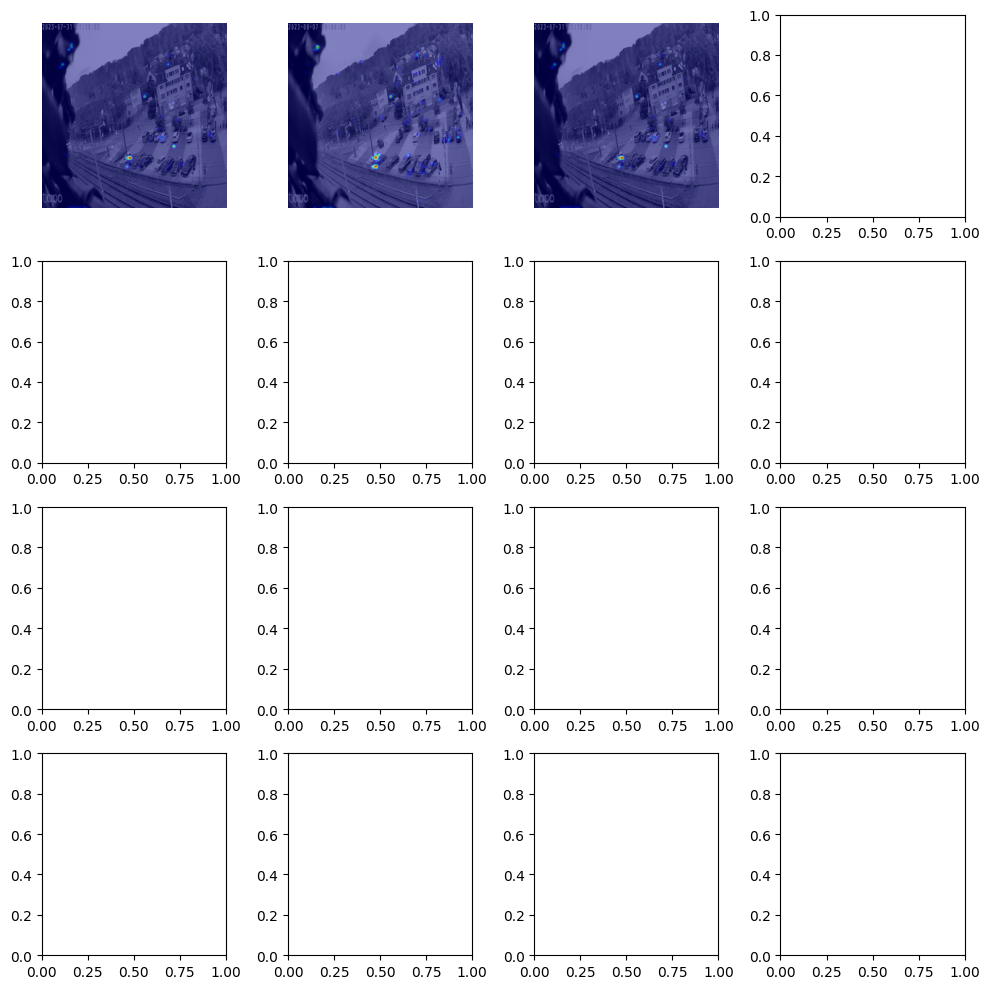

In [16]:
# show grad-cam heatmap of occupied but incorrectly predicted 
def loss(output):
    return output[:, 1]

correct_predictions_df = predictions_df[('occupied' == predictions_df['true_class']) & (predictions_df['true_class'] != predictions_df['predicted_class'])]
num_samples = 16
if len(correct_predictions_df) >= num_samples:
    random_correct_predictions = correct_predictions_df.sample(n=num_samples, random_state=42)
else:
    random_correct_predictions = correct_predictions_df.sample(n=min(num_samples, len(correct_predictions_df)), replace=True, random_state=42)

selected_images = random_correct_predictions['image_path'].tolist()
fig, axs = plt.subplots(4, 4, figsize=(10, 10))
axs = axs.flatten()

for idx, image_path in enumerate(selected_images):
    img = Image.open(image_path).convert('L')
    img = img.resize((256, 256), Image.Resampling.LANCZOS)
    img_array = np.array(img) / 1.0
    img_array = img_array[:, :, np.newaxis]

    heatmap = gradcam(loss, img_array[np.newaxis, ...], penultimate_layer='conv3', expand_cam=True)
    heatmap = normalize(heatmap)
    heatmap_resized = cv2.resize(heatmap[0], (256, 256))

    axs[idx].imshow(img_array.squeeze(), cmap='gray')
    axs[idx].imshow(heatmap_resized, cmap='jet', alpha=0.5)
    axs[idx].axis('off')

plt.tight_layout()
plt.savefig('artifacts/gradcam-occupied-but-incorrectly-predicted_{}.png'.format(experiment))